# Authorizing an application to access Twitter account data

In [1]:
import twitter
CONSUMER_KEY = 'write consumer key here'
CONSUMER_SECRET = 'write consumer secret'
OAUTH_TOKEN = 'write token'
OAUTH_TOKEN_SECRET = 'write token secret'
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)

print twitter_api

# Exploring Trending Topics

In [2]:
WORLD_WOE_ID = 1
US_WOE_ID = 23424977
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)
print world_trends
print
print us_trends

[{u'created_at': u'2018-01-01T05:24:40Z', u'trends': [{u'url': u'http://twitter.com/search?q=%23CNNNYE', u'query': u'%23CNNNYE', u'tweet_volume': 49771, u'name': u'#CNNNYE', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%22Feliz+2018%22', u'query': u'%22Feliz+2018%22', u'tweet_volume': 415815, u'name': u'Feliz 2018', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23RockinEve', u'query': u'%23RockinEve', u'tweet_volume': 355201, u'name': u'#RockinEve', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%E3%82%A2%E3%82%AD%E3%83%A9100', u'query': u'%E3%82%A2%E3%82%AD%E3%83%A9100', u'tweet_volume': 91105, u'name': u'\u30a2\u30ad\u30e9100', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23%D8%A7%D9%84%D8%B1%D8%A7%D8%AA%D8%A8_%D9%85%D8%A7%D9%8A%D9%83%D9%81%D9%8A_%D8%A7%D9%84%D8%AD%D8%A7%D8%AC%D9%87', u'query': u'%23%D8%A7%D9%84%D8%B1%D8%A7%D8%AA%D8%A8_%D9%85%D8%A7%D9%8A%D9%83%D9%81%D9%8A_%D8%A7%D9%84%D8%AD%D8%A7%D

# Displaying API responses as pretty-printed JSON

In [3]:
import json
print json.dumps(world_trends, indent=1)
print
print json.dumps(us_trends, indent=1)

[
 {
  "created_at": "2018-01-01T05:24:40Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=%23CNNNYE", 
    "query": "%23CNNNYE", 
    "tweet_volume": 49771, 
    "name": "#CNNNYE", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%22Feliz+2018%22", 
    "query": "%22Feliz+2018%22", 
    "tweet_volume": 415815, 
    "name": "Feliz 2018", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23RockinEve", 
    "query": "%23RockinEve", 
    "tweet_volume": 355201, 
    "name": "#RockinEve", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%E3%82%A2%E3%82%AD%E3%83%A9100", 
    "query": "%E3%82%A2%E3%82%AD%E3%83%A9100", 
    "tweet_volume": 91105, 
    "name": "\u30a2\u30ad\u30e9100", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23%D8%A7%D9%84%D8%B1%D8%A7%D8%AA%D8%A8_%D9%85%D8%A7%D9%8A%D9%83%D9%81%D9%8A_%D8%A7%D9%84%D8%AD%D8%A7%D8%AC%D9%87", 
  

# Computing the intersection of two sets of trends

In [4]:
world_trends_set = set([trend['name']
for trend in world_trends[0]['trends']])
us_trends_set = set([trend['name']
for trend in us_trends[0]['trends']])
common_trends = world_trends_set.intersection(us_trends_set)
print common_trends

set([u'#StartingOverIn5Words', u'#DisneyParksLIVE', u'#RockinEve', u'Neil Diamond', u'Jenny McCarthy', u'Don Lemon', u'#FoxNews2018', u'Britney Spears', u'#AG4IsComing', u'Planet Fitness', u'Steve Harvey', u'#VegasNYE', u'Bills', u'#AwkwardTimesToBeFilmed', u'#HQTrivia'])


# Collecting search result

In [10]:
# Import unquote to prevent url encoding errors in next_results
from urllib import unquote

# XXX: Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#Modi' 

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print json.dumps(statuses[0], indent=1)

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
{
 "contributors": null, 
 "truncated": false, 
 "text": "RT @EconomicTimes: River #Ganga in PM #Modi's constituency #Varanasi may be among the first places in India to get a regular #seaplane serv\u2026", 
 "is_quote_status": false, 
 "in_reply_to_status_id": null, 
 "id": 947704794969337856, 
 "favorite_count": 0, 
 "entities": {
  "symbols": [], 
  "user_mentions": [
   {
    "id": 39743812, 
    "indices": [
     3, 
     17
    ], 
    "id_str": "39743812", 
    "screen_name": "EconomicTimes", 
    "name": "EconomicTimes"
   }
  ], 
  "hashtags": [
   {
    "indices": [
     25, 
     31
    ], 
    "text": "Ganga"
   }, 
   {
    "indices": [
     38, 
     43
    ], 
    "text": "Modi"
   }, 
   {
    "indices": [
     59, 
     68
    ], 
    "text": "Varanasi"
   }, 
   {
    "indices": [
     125, 
     134
    ], 
    "text": "seaplane"
   }
  ], 
  "urls": []
 

# Extracting text, screen names, and hashtags from tweets

In [11]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print json.dumps(status_texts[0:5], indent=1)
print json.dumps(screen_names[0:5], indent=1) 
print json.dumps(hashtags[0:5], indent=1)
print json.dumps(words[0:5], indent=1)

[
 "RT @EconomicTimes: River #Ganga in PM #Modi's constituency #Varanasi may be among the first places in India to get a regular #seaplane serv\u2026", 
 "Victory of Indian Diplomacy. Palestine recalls envoy for sharing stage with Hafiz Saeed https://t.co/RGperQChZJ\u2026 https://t.co/WXaBadf4Q0", 
 "RT @swabhimani1: #Modi urges Indians to eat healthy, exercise, do #yoga  to prevent #diabetes   and other lifestyle #diseases  @ANI  https:\u2026", 
 "RT @mikemik35416149: @timesofindia @narendramodi Average age in #India is 26.\nNo great secret.\nSo why #Modi invest $5B in #Russia #Oil fiel\u2026", 
 "@timesofindia @narendramodi Average age in #India is 26.\nNo great secret.\nSo why #Modi invest $5B in #Russia #Oil f\u2026 https://t.co/Ry2Wu5NuSb"
]
[
 "EconomicTimes", 
 "swabhimani1", 
 "ANI", 
 "mikemik35416149", 
 "timesofindia"
]
[
 "Ganga", 
 "Modi", 
 "Varanasi", 
 "seaplane", 
 "Modi"
]
[
 "RT", 
 "@EconomicTimes:", 
 "River", 
 "#Ganga", 
 "in"
]


# Creating a basic frequency distribution from the words in tweets

In [12]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print c.most_common()[:10] # top 10
    print

[(u'#Modi', 367), (u'for', 347), (u'RT', 307), (u'by', 236), (u'Muslim', 224), (u'@ShankhNaad:', 115), (u'women', 113), (u'to', 103), (u'per', 103), (u'govt', 102)]

[(u'ShankhNaad', 115), (u'Writer_Naina', 59), (u'narendramodi', 37), (u'Pooja_namobhakt', 25), (u'mazhai_magal', 13), (u'ANI', 10), (u'OfficeOfRG', 10), (u'EconomicTimes', 7), (u'swabhimani1', 6), (u'Khan_hits', 6)]

[(u'Modi', 398), (u'modi', 101), (u'Rajini', 61), (u'MannKiBaat', 36), (u'Congress', 30), (u'BJP', 27), (u'\u0938\u094b\u0928\u093f\u092f\u093e\u0917\u093e\u0902\u0927\u0940', 27), (u'\u0926\u094b\u0917\u0932\u093e\u092a\u0928', 27), (u'India', 19), (u'Muslim', 13)]



# Using prettytable to display tuples in a nice tabular format

In [13]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print pt


+--------------+-------+
| Word         | Count |
+--------------+-------+
| #Modi        |   367 |
| for          |   347 |
| RT           |   307 |
| by           |   236 |
| Muslim       |   224 |
| @ShankhNaad: |   115 |
| women        |   113 |
| to           |   103 |
| per          |   103 |
| govt         |   102 |
+--------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| ShankhNaad      |   115 |
| Writer_Naina    |    59 |
| narendramodi    |    37 |
| Pooja_namobhakt |    25 |
| mazhai_magal    |    13 |
| ANI             |    10 |
| OfficeOfRG      |    10 |
| EconomicTimes   |     7 |
| swabhimani1     |     6 |
| Khan_hits       |     6 |
+-----------------+-------+
+-------------+-------+
| Hashtag     | Count |
+-------------+-------+
| Modi        |   398 |
| modi        |   101 |
| Rajini      |    61 |
| MannKiBaat  |    36 |
| Congress    |    30 |
| BJP         |    27 |
| सोनियागांधी |    27 |
| दोगलापन     |   

# Calculating lexical diversity for tweets

In [14]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print lexical_diversity(words)
print lexical_diversity(screen_names)
print lexical_diversity(hashtags)
print average_words(status_texts)


0.296911421911
0.367066895369
0.273669661368
17.16


# Finding the most popular retweets

In [15]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if status.has_key('retweeted_status')
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print pt

+-------+-----------------+----------------------------------------------------+
| Count | Screen Name     | Text                                               |
+-------+-----------------+----------------------------------------------------+
| 3793  | SaijoAntony     | RT @SaijoAntony: Show Your Support !!!!            |
|       |                 |                                                    |
|       |                 | RT 🔁 #Mersal #Thalapathy                           |
|       |                 |                                                    |
|       |                 | LIKE ❤ #Modi #BJP                                  |
|       |                 |                                                    |
|       |                 | #SupportMersal #MersalVsModi                       |
|       |                 | #JosephVijay #Blockbus…                            |
| 3793  | SaijoAntony     | RT @SaijoAntony: Show Your Support !!!!            |
|       |                 | 

# Looking up users who have retweeted a status

In [23]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here in place of the sample value that is provided
# from the text of the book




# Plotting frequencies of words

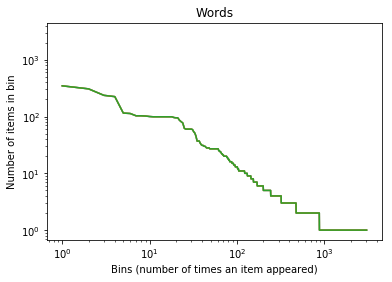

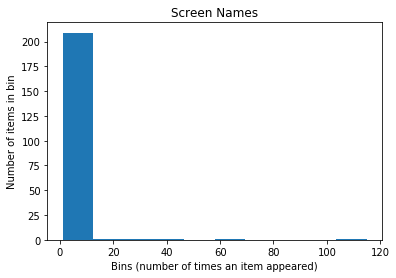

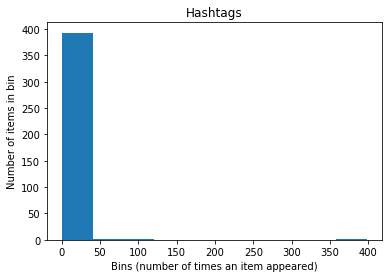

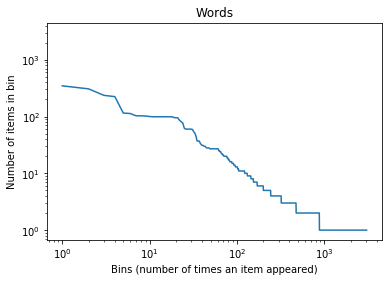

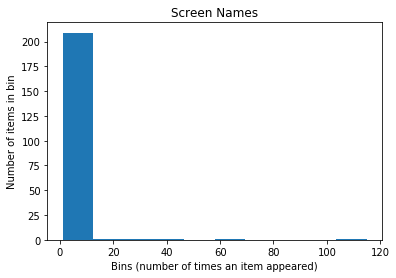

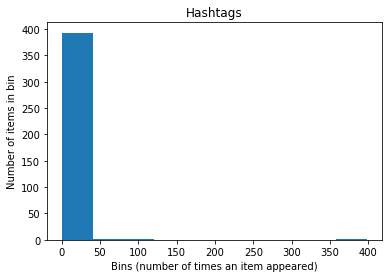

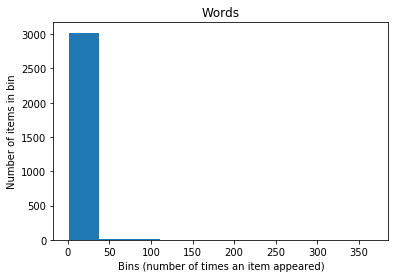

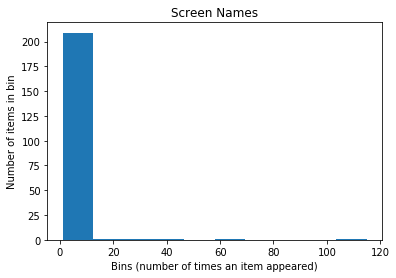

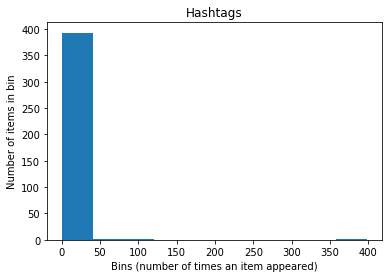

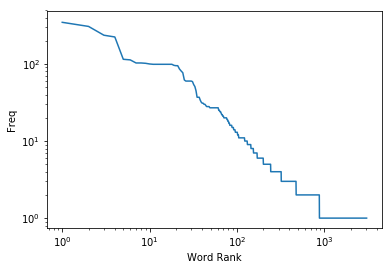

In [28]:

import pandas as pd    #pandas is dataframe library
import matplotlib.pyplot as plt  #plots data
import numpy as np     #numpy provides N dim object support
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.show()

# Generating histograms of words, screen names, and hashtags

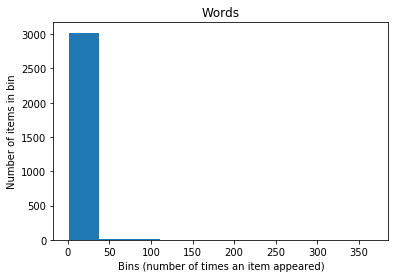

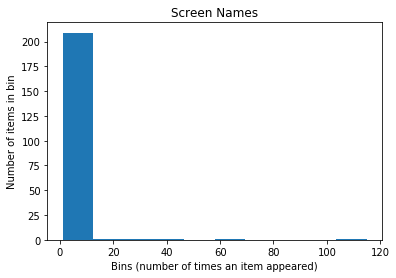

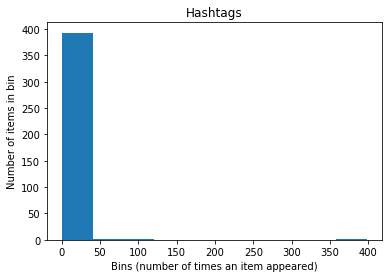

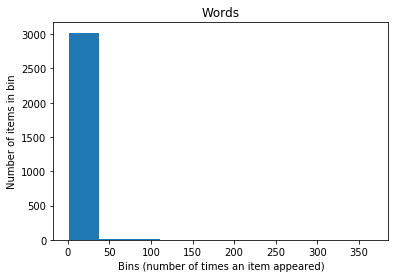

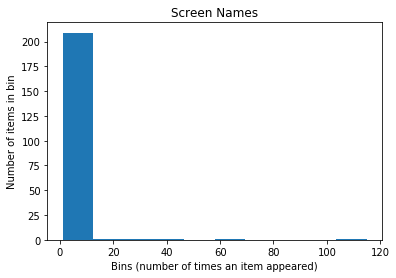

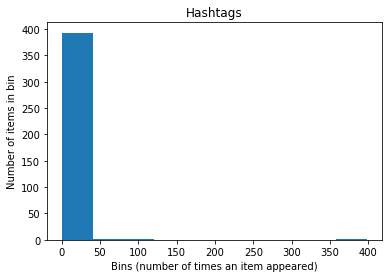

In [30]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values())
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()
    plt.show()